In [4]:
import pandas as pd
import json
import numpy as np
from collections import defaultdict

In [3]:
u=[]
v=[]
r=[]
history_u = defaultdict(list)
history_v = defaultdict(list)
f = open("ml-1m/ratings.dat","r").readlines()
for l in f:
    l = l.replace("\n","")
    l = l.split("::")
    u.append(l[0])
    v.append(l[1])
    r.append(l[2])


In [6]:
n = list(np.arange(len(u)))
import random
random.shuffle(n)
l = len(n)
train_u = []
train_v = []
train_r = []
for i in range(4*l//5):
    train_u.append(u[n[i]])
    train_v.append(v[n[i]])
    train_r.append(r[n[i]])




In [7]:
data = {"users":train_u,"items":train_v,"rating":train_r}


In [8]:
with open("train_1m.json","w")as fp:
    json.dump(data,fp)

In [9]:
train_u = []
train_v = []
train_r = []
for i in range(4*l//5,l):
    train_u.append(u[n[i]])
    train_v.append(v[n[i]])
    train_r.append(r[n[i]])
data = {"users":train_u,"items":train_v,"rating":train_r}
with open("test_1m.json","w")as fp:
    json.dump(data,fp)

In [14]:
items = pd.read_csv("ml-100k/u.item.csv",sep="|")

In [29]:
items

,movie id,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,01-Jan-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,01-Jan-1994,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
items.drop("IMDb URL ",axis=1, inplace=True)

In [122]:
data = items.drop("movie id ",axis=1,)

In [123]:
ID = items["movie id "]

In [124]:
data[' release date '].fillna(data[' release date '].mode()[0], inplace=True)

In [125]:
mode = data[' release date '].mode()
mode

0    01-Jan-1995
dtype: object

In [126]:
columns = list(data.columns)
for c in columns[1:]:
    data[c].fillna(data[c].mode()[0], inplace=True)

In [127]:
for index, row in data.iterrows():
   
    if row[" release date "] is None : row[" release date "] = mode
    row[" release date "] = int(row[" release date "][-4:])/4
    data[" release date "][index] = row[" release date "]
    print(row[" release date "])

<ipython-input-127-f58d092cce22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[" release date "][index] = row[" release date "]


498.75
498.75
498.75
498.75
498.75
498.75
498.75
498.75
498.75
499.0
498.75
498.75
498.75
498.5
499.0
498.75
499.0
498.75
498.75
498.75
499.0
499.0
499.0
499.0
499.0
498.75
498.75
498.75
498.75
491.75
498.75
498.5
498.75
498.75
498.75
498.75
498.5
498.75
498.75
498.75
498.75
498.5
498.5
498.5
498.5
498.5
498.5
498.5
498.5
494.25
498.5
498.5
498.5
498.75
498.5
498.5
498.5
498.5
498.5
498.25
498.5
498.5
498.5
498.5
498.25
498.75
498.5
498.5
498.5
498.5
498.5
498.5
498.5
491.25
498.5
498.25
498.25
498.25
498.25
498.25
498.5
498.25
498.25
498.5
498.5
498.25
498.25
498.25
495.5
498.25
498.25
498.25
499.0
497.5
498.0
497.75
497.5
497.75
484.25
499.25
495.25
492.5
499.0
499.0
499.0
499.0
499.0
499.0
499.0
498.75
499.0
499.0
499.0
499.0
499.0
499.0
499.0
499.0
498.5
499.0
499.0
499.0
499.0
499.0
499.0
499.0
493.0
499.0
499.0
499.0
490.25
484.75
484.75
485.25
492.0
484.75
499.0
499.0
492.25
498.25
488.5
492.75
491.25
497.0
498.0
499.0
499.0
499.0
499.0
499.0
492.75
493.25
497.0
494.75
496.75
49

In [128]:
data

,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,498.75,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,498.75,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,498.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,498.75,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,498.75,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,499.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,499.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,499.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,498.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [129]:
data_np = data.to_numpy(dtype=np.float)

In [130]:
data_np.shape

(1682, 20)

In [134]:
from sklearn.cluster import KMeans
clusters = [i*10 for i in range(1,50)]
err = []
for c in clusters:
    kmeans = KMeans(n_clusters=int(c), random_state=0).fit(data_np)
    err.append(kmeans.inertia_)
    


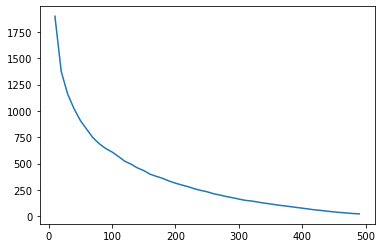

In [135]:
import matplotlib.pyplot as plt
plt.plot(clusters,err)

In [136]:
n = 100
kmeans = KMeans(n_clusters=n, random_state=0).fit(data_np)

In [146]:
movie_cluster = {}
for i in range(data_np.shape[0]):
    movie_cluster[str(ID[i])] = int(kmeans.predict([data_np[i]])[0])

In [147]:
movie_cluster

{'1': 12,
 '2': 25,
 '3': 8,
 '4': 15,
 '5': 71,
 '6': 37,
 '7': 37,
 '8': 15,
 '9': 37,
 '10': 40,
 '11': 71,
 '12': 71,
 '13': 4,
 '14': 72,
 '15': 37,
 '16': 9,
 '17': 26,
 '18': 37,
 '19': 37,
 '20': 13,
 '21': 25,
 '22': 83,
 '23': 34,
 '24': 47,
 '25': 4,
 '26': 4,
 '27': 6,
 '28': 91,
 '29': 67,
 '30': 42,
 '31': 34,
 '32': 10,
 '33': 55,
 '34': 15,
 '35': 19,
 '36': 13,
 '37': 0,
 '38': 45,
 '39': 59,
 '40': 4,
 '41': 4,
 '42': 29,
 '43': 34,
 '44': 34,
 '45': 15,
 '46': 0,
 '47': 15,
 '48': 10,
 '49': 9,
 '50': 7,
 '51': 51,
 '52': 0,
 '53': 26,
 '54': 91,
 '55': 97,
 '56': 93,
 '57': 0,
 '58': 0,
 '59': 0,
 '60': 0,
 '61': 0,
 '62': 17,
 '63': 41,
 '64': 0,
 '65': 15,
 '66': 9,
 '67': 29,
 '68': 55,
 '69': 9,
 '70': 9,
 '71': 61,
 '72': 29,
 '73': 86,
 '74': 42,
 '75': 10,
 '76': 93,
 '77': 34,
 '78': 19,
 '79': 26,
 '80': 86,
 '81': 9,
 '82': 17,
 '83': 9,
 '84': 32,
 '85': 29,
 '86': 0,
 '87': 0,
 '88': 9,
 '89': 88,
 '90': 9,
 '91': 41,
 '92': 75,
 '93': 15,
 '94': 20,
 '9

In [166]:
with open("movie_neighbor_100k.json","w")as fp:
    json.dump(movie_neighbor,fp)

In [165]:
movie_neighbor = defaultdict(list)
k=10
for i in range(data_np.shape[0]):
    a = data_np - data_np[i]
    a=np.sum(a**2,axis=-1)
    #print(a)
    movie_neighbor[str(ID[i])] = [int(x) for x in list(a.argsort()[:k]+1)]
    #print(movie_neighbor)
    

In [163]:
movie_neighbor

defaultdict(list,
            {'1': [1, 422, 1470, 996, 1219, 1066, 1412, 929, 400, 623],
             '2': [2, 566, 1314, 982, 930, 118, 117, 827, 1016, 1013],
             '3': [1131, 1253, 3, 1549, 1217, 1471, 1207, 1248, 1077, 1621],
             '4': [4, 723, 964, 789, 787, 1465, 34, 695, 715, 953],
             '5': [1208, 5, 1069, 1213, 332, 100, 348, 329, 1508, 11],
             '6': [1107, 1227, 461, 460, 1518, 1616, 459, 1486, 458, 1343],
             '7': [7, 258, 1006, 1227, 1260, 1261, 1267, 277, 279, 920],
             '8': [8, 34, 715, 723, 726, 1063, 787, 789, 1465, 695],
             '9': [1107, 1227, 461, 460, 1518, 1616, 459, 1486, 458, 1343],
             '10': [744, 471, 10, 891, 690, 935, 1663, 1176, 1423, 318],
             '11': [11, 12, 1143, 583, 361, 754, 1083, 1598, 336, 156],
             '12': [11, 12, 1143, 583, 361, 754, 1083, 1598, 336, 156],
             '13': [1305, 1246, 1435, 721, 722, 1446, 1225, 372, 40, 41],
             '14': [1211, 643, 794, 12

# user #

In [10]:
users = pd.read_csv("ml-1m/users.dat",sep="::") 
users.columns

<ipython-input-10-2c7fa874aefb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv("ml-1m/users.dat",sep="::")


Index(['user id', 'gender', 'age', 'occupation', 'e'], dtype='object')

In [175]:
users.drop(" zip code",axis=1,inplace=True)

In [11]:
users_id = users["user id"]

In [179]:
list_occ = ["administrator","artist","doctor","educator","engineer","entertainment","executive","healthcare","homemaker","lawyer","librarian","marketing","none","other","programmer","retired","salesman","scientist","student","technician","writer"]

In [15]:
n = len(users_id)
data_u = np.zeros((n,2+21))
ages = ["1","18","25","35","45","50","56"]

In [17]:
for index, row in users.iterrows():
    
    data_u[index][0] = ages.index(str(row["age"]))
    if row["gender"] == "M":
        data_u[index][1] = 0
    elif row["gender"] == "F":
        data_u[index][1] = 1
    else:
        data_u[index][1] = 1
    vec = np.zeros((21))
    idx = int(row["occupation"])
    vec[idx] = 1
    data_u[index][2:] = vec
    

In [18]:
data_u

array([[0., 1., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [6., 1., 0., ..., 0., 0., 0.],
       [4., 1., 1., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.cluster import KMeans
clusters = [i*10 for i in range(1,30)]
err = []
for c in clusters:
    kmeans = KMeans(n_clusters=int(c), random_state=0).fit(data_u)
    err.append(kmeans.inertia_)
    


<ipython-input-20-53d9bd5bfebf>:5: ConvergenceWarning: Number of distinct clusters (241) found smaller than n_clusters (250). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=int(c), random_state=0).fit(data_u)
<ipython-input-20-53d9bd5bfebf>:5: ConvergenceWarning: Number of distinct clusters (241) found smaller than n_clusters (260). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=int(c), random_state=0).fit(data_u)
<ipython-input-20-53d9bd5bfebf>:5: ConvergenceWarning: Number of distinct clusters (241) found smaller than n_clusters (270). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=int(c), random_state=0).fit(data_u)
<ipython-input-20-53d9bd5bfebf>:5: ConvergenceWarning: Number of distinct clusters (241) found smaller than n_clusters (280). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=int(c), random_state=0).fit(data_u)
<ipython-input-20-53d9bd5bfebf>:5: ConvergenceWarning: Number of distinct cluste

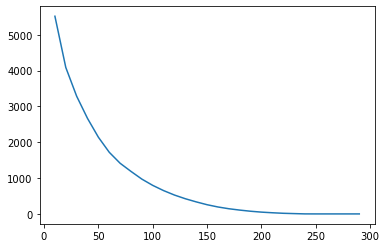

In [21]:
import matplotlib.pyplot as plt
plt.plot(clusters,err)

In [22]:
n = 100
kmeans = KMeans(n_clusters=n, random_state=0).fit(data_u)

In [23]:
user_cluster = {}
for i in range(data_u.shape[0]):
    user_cluster[str(users_id[i])] = int(kmeans.predict([data_u[i]])[0])

In [24]:
user_cluster

{'1': 32,
 '2': 93,
 '3': 26,
 '4': 0,
 '5': 40,
 '6': 10,
 '7': 33,
 '8': 13,
 '9': 17,
 '10': 55,
 '11': 8,
 '12': 13,
 '13': 54,
 '14': 3,
 '15': 14,
 '16': 52,
 '17': 50,
 '18': 39,
 '19': 11,
 '20': 1,
 '21': 21,
 '22': 26,
 '23': 3,
 '24': 58,
 '25': 5,
 '26': 14,
 '27': 30,
 '28': 8,
 '29': 12,
 '30': 83,
 '31': 67,
 '32': 44,
 '33': 64,
 '34': 35,
 '35': 54,
 '36': 74,
 '37': 71,
 '38': 2,
 '39': 5,
 '40': 75,
 '41': 2,
 '42': 1,
 '43': 13,
 '44': 63,
 '45': 69,
 '46': 76,
 '47': 5,
 '48': 23,
 '49': 38,
 '50': 57,
 '51': 32,
 '52': 5,
 '53': 19,
 '54': 50,
 '55': 56,
 '56': 25,
 '57': 76,
 '58': 18,
 '59': 10,
 '60': 50,
 '61': 17,
 '62': 24,
 '63': 5,
 '64': 81,
 '65': 60,
 '66': 42,
 '67': 10,
 '68': 5,
 '69': 8,
 '70': 5,
 '71': 1,
 '72': 86,
 '73': 5,
 '74': 37,
 '75': 32,
 '76': 12,
 '77': 5,
 '78': 27,
 '79': 86,
 '80': 77,
 '81': 44,
 '82': 17,
 '83': 57,
 '84': 5,
 '85': 5,
 '86': 32,
 '87': 1,
 '88': 27,
 '89': 31,
 '90': 4,
 '91': 12,
 '92': 2,
 '93': 17,
 '94': 17,


In [25]:
with open("user_cluster_1m.json","w")as fp:
    json.dump(user_cluster,fp)

In [26]:
user_neighbor = defaultdict(list)
k=10
for i in range(data_u.shape[0]):
    a = data_u - data_u[i]
    a=np.sum(a**2,axis=-1)
    #print(a)
    user_neighbor[str(users_id[i])] = [int(x) for x in list(a.argsort()[:k]+1)]
    #print(movie_neighbor)
    

In [28]:
with open("user_neighbor_1m.json","w")as fp:
    json.dump(user_neighbor,fp)

# movie

In [29]:
movies = pd.read_csv("ml-1m/movies.dat",sep="::")

<ipython-input-29-27df14860216>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("ml-1m/movies.dat",sep="::")


In [31]:
list_occ = ["Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western",]

In [32]:
movie_id = movies["movie id"]

In [33]:
n = len(movie_id)
data_u = np.zeros((n,19))

In [36]:
for index, row in movies.iterrows():
    
    data_u[index][0] = int(row["name"][-5:-1])/5
    occ = row["occ"]
    occ = occ.split("|")
    vec = np.zeros((18))
    for o in occ:
        vec[list_occ.index(o)] = 1
    data_u[index][1:]=vec

In [37]:
data_u

array([[399.,   0.,   0., ...,   0.,   0.,   0.],
       [399.,   0.,   1., ...,   0.,   0.,   0.],
       [399.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [400.,   0.,   0., ...,   0.,   0.,   0.],
       [400.,   0.,   0., ...,   0.,   0.,   0.],
       [400.,   0.,   0., ...,   1.,   0.,   0.]])

In [38]:
from sklearn.cluster import KMeans
clusters = [i*10 for i in range(1,30)]
err = []
for c in clusters:
    kmeans = KMeans(n_clusters=int(c), random_state=0).fit(data_u)
    err.append(kmeans.inertia_)
    


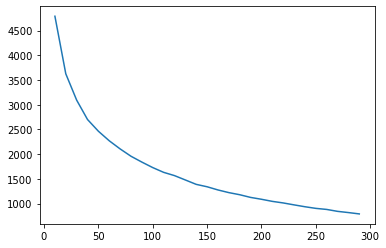

In [39]:
import matplotlib.pyplot as plt
plt.plot(clusters,err)

In [40]:
n = 100
kmeans = KMeans(n_clusters=n, random_state=0).fit(data_u)
user_cluster = {}
for i in range(data_u.shape[0]):
    user_cluster[str(movie_id[i])] = int(kmeans.predict([data_u[i]])[0])

In [41]:
with open("movie_cluster_1m.json","w")as fp:
    json.dump(user_cluster,fp)

In [42]:
user_neighbor = defaultdict(list)
k=10
for i in range(data_u.shape[0]):
    a = data_u - data_u[i]
    a=np.sum(a**2,axis=-1)
    #print(a)
    user_neighbor[str(movie_id[i])] = [int(x) for x in list(a.argsort()[:k]+1)]
    #print(movie_neighbor)
    

In [43]:
with open("movie_neighbor_1m.json","w")as fp:
    json.dump(user_neighbor,fp)